# Import library

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn import impute
warnings.filterwarnings("ignore")

# Load dataset

In [126]:
df = pd.read_json("../data/demo.json")
df = df.drop(['start_date'], axis = 1)
df = df.drop_duplicates()
df = df.drop(['end_date','description'], axis = 1)
df.shape



(5, 16)

In [127]:
def convert_area(area):
    for i in range(len(area)):
        try:
            if re.search("m$", area[i]):
                area[i] = re.sub("m", "", area[i])
                area[i] = re.sub(",", ".", area[i])
                area[i] = float(area[i])
            else:
                area[i] = np.nan
        except:
            area[i] = np.nan
    return area

def convert_direction(direction):
    for i in range(len(direction)):
        if (direction[i] == '_'):
            direction[i] = np.nan
        else:
            continue
    return direction

def convert_law(law):
    for i in range(len(law)):
        if law[i] == "---":
            law[i] = np.nan
        else:
            continue
    return law
        
def convert_price(price):
    for i in range(len(price)):
        try:
            if re.search("tỷ $", price[i]):
                price[i] = price[i].split(' ')[1]
                price[i] = re.sub(",", ".", price[i])
                price[i] = float(price[i])
            else:
                price[i] = np.nan
        except:
            price[i] = np.nan
    return price

def convert_address(address):
    city = []
    district = []
    for i in range(len(address)):
        address[i] = re.split(', ', address[i])
        try:
            if re.search('Quận ', address[i][-2]):
                address[i][-2] = re.sub('Quận ', '', address[i][-2])
            else:
                address[i][-2] = re.sub('Huyện ', '', address[i][-2])
        except:
            address[i][-2] = np.nan
        district.append(address[i][-2])
        city.append(address[i][-1])
        
    return city, district

In [128]:
price = df['price'].tolist()
area = df['area'].tolist()
width = df['width'].tolist()
height = df['height'].tolist()
street_infront_house = df['street_in_front_of_house'].tolist()
direction = df['direction'].tolist()
law = df['law'].tolist()
address = df['address'].tolist()

area = convert_area(area)
width = convert_area(width)
height = convert_area(height)
street_infront_house = convert_area(street_infront_house)
direction = convert_direction(direction)
price = convert_price(price)
law = convert_law(law)
city, district = convert_address(address)

df['price'] = price
df['area'] = area
df['width'] = width
df['height'] = height
df['street_in_front_of_house'] = street_infront_house
df['direction'] = direction
df['law'] = law
df['city'] = city
df['district'] = district

bedroom_no = df['bedroom_number'].tolist()
floor_no = df['floor_number'].tolist()
for i in range(len(bedroom_no)):
    try:
        bedroom_no[i] = float(bedroom_no[i])
    except:
        bedroom_no[i] = np.nan

for i in range(len(floor_no)):
    try:
        floor_no[i] = float(floor_no[i])
    except:
        floor_no[i] = np.nan
df['bedroom_number'] = bedroom_no
df['floor_number'] = floor_no
df.head()

,price,address,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law,city,district
0,57.0,"Phố Trích Sài, Phường Thụy Khuê, Quận Tây Hồ,...",67.0,5.0,3.0,True,True,True,True,False,Nhà mặt tiền,NaN,10.0,NaN,NaN,Sổ hồng/ Sổ đỏ,Hà Nội,Tây Hồ
1,17.5,"Đường Nguyễn Văn Huyên, Phường Nghĩa Đô, Quận...",50.0,7.0,4.0,True,True,True,True,False,Nhà mặt tiền,Nam,8.0,4.0,12.0,Sổ hồng/ Sổ đỏ,Hà Nội,Cầu Giấy
2,16.5,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quậ...",60.0,7.0,20.0,True,True,True,True,False,Nhà trong hẻm,Đông Nam,3.0,6.0,12.0,Sổ hồng/ Sổ đỏ,Hà Nội,Cầu Giấy
3,14.9,"Phố Phùng Chí Kiên, Phường Nghĩa Đô, Quận Cầu...",48.0,6.0,3.0,True,True,True,True,False,Nhà mặt tiền,NaN,6.0,4.0,12.0,Sổ hồng/ Sổ đỏ,Hà Nội,Cầu Giấy
4,21.5,"Phố Trung Kính, Phường Trung Hòa, Quận Cầu Gi...",50.0,7.0,4.0,True,True,True,True,False,Nhà mặt tiền,NaN,10.0,4.1,12.0,Sổ hồng/ Sổ đỏ,Hà Nội,Cầu Giấy


In [129]:
df = df.drop(['address','city','law'], axis =  1)
df = df[df.price.notna()]
df = df.drop('is_owner', axis = 1)
df.drop(df[df.price > 50].index, inplace = True)
df.drop(df[df.area > 400].index, inplace = True)
df.drop(df[df.area <= 0].index, inplace = True)

df.drop(df[df.floor_number > 10].index, inplace = True)
df.drop(df[df.floor_number <= 0].index, inplace = True)

df.drop(df[df.bedroom_number > 10].index, inplace = True)
df.drop(df[df.bedroom_number <= 0].index, inplace = True)

df.drop(df[df.street_in_front_of_house > 25].index, inplace = True)

df.drop(df[df.width > 20].index, inplace = True)
df.drop(df[df.width <= 0].index, inplace = True)

df.drop(df[df.height > 25].index, inplace = True)
df.drop(df[df.height <= 0].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

df = df.drop(['height'], axis=1)

In [130]:
def process_cc(row):
    if row['type'] == 'Căn hộ chung cư' and pd.isna(row['floor_number']):
        row['floor_number'] = 1
    return row
df = df.apply(process_cc, axis=1)

In [131]:
df.select_dtypes(exclude=['object', 'bool']).isna().mean().sort_values(ascending = False)

price                       0.0
area                        0.0
floor_number                0.0
bedroom_number              0.0
street_in_front_of_house    0.0
width                       0.0
dtype: float64

In [132]:
columns = ['width', 'floor_number', 'bedroom_number', 'street_in_front_of_house', 'price', 'area']
for i in columns:
    imp = impute.SimpleImputer()
    df[i] = imp.fit_transform(np.array(df[i]).reshape(-1,1))
    if i == 'floor_number' or i == 'bedroom_number':
        df[i] = df[i].round()

In [133]:
df.fillna('None', inplace = True)
df = df.drop('direction', axis = 1)

def process_type(row):
    if row['type'] not in ['Căn hộ chung cư', 'Nhà trong hẻm']:
        row['type'] = 'Nhà mặt phố'
    return row
df = df.apply(process_type, axis=1)

def process_district(row):
    if row['district'] not in ['Long Biên', 'Hoàng Mai', 'Nam Từ Liêm', 'Bắc Từ Liêm', 'Đống Đa', 'Hai Bà Trưng', 'Thanh Xuân', 'Cầu Giấy', 'Tây Hồ','Đông Anh','Gia Lâm','Hà Đông','Hoàn Kiếm','Ba Đình']:
        row['district'] = 'Ngoại thành'
    return row
df = df.apply(process_district, axis=1)



In [134]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
df['is_dinning_room'] = label_encoder.fit_transform(df['is_dinning_room'])
df['is_kitchen'] = label_encoder.fit_transform(df['is_kitchen'])
df['is_terrace'] = label_encoder.fit_transform(df['is_terrace'])
df['is_car_pack'] = label_encoder.fit_transform(df['is_car_pack'])
#  df['type'] = label_encoder.fit_transform(df['type'])
#  df['district'] = label_encoder.fit_transform(df['district'])



In [135]:
df.to_csv('../data/demo.csv', index=False)

In [136]:
df_demo = df.copy()

# Preprocessing

In [137]:
df_train = pd.read_csv('../data/train.csv')
df_val = pd.read_csv('../data/val.csv')
df_test = pd.read_csv('../data/test.csv')
df = pd.concat([df_train, df_val], axis=0)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,23.90,80.0,6.0,6.0,1,1,1,1,Nhà mặt phố,8.0,5.000000,Long Biên
1,7.40,59.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,5.180581,Bắc Từ Liêm
2,8.40,45.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Thanh Xuân
3,5.25,35.0,4.0,3.0,1,1,1,0,Nhà trong hẻm,2.5,3.300000,Hà Đông
4,26.00,55.0,9.0,7.0,1,1,1,1,Nhà trong hẻm,7.0,5.180581,Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...
644,27.00,125.0,5.0,3.0,1,1,1,1,Nhà mặt phố,8.0,6.000000,Ngoại thành
645,31.00,75.0,8.0,10.0,1,1,1,1,Nhà trong hẻm,6.0,6.200000,Thanh Xuân
646,2.80,85.0,5.0,4.0,0,0,0,0,Nhà mặt phố,4.0,4.000000,Ngoại thành
647,12.00,54.0,4.0,6.0,0,0,0,0,Nhà trong hẻm,3.0,4.300000,Hai Bà Trưng


In [138]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
numerical_cols = features_numerical.columns.tolist()

numerical_cols.remove('price')

features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
categorical_cols = features_categorical.columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)     
    ],
    remainder='passthrough' 
)



In [139]:
y_train = df_train['price'].copy()
y_val = df_val['price'].copy()
y_demo = df_demo['price'].copy()

df_train = df_train.drop(['price'], axis = 1)
df_val = df_val.drop(['price'], axis = 1)
df_demo = df_demo.drop(['price'], axis = 1)

y_train.to_numpy()
y_val.to_numpy()
y_demo.to_numpy()

X_train = preprocessor.fit_transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)
X_demo = preprocessor.transform(df_demo)

In [140]:
X_train.shape, X_val.shape, X_test.shape, X_demo.shape, y_train.shape, y_val.shape, y_demo.shape

((1945, 27), (649, 27), (649, 27), (3, 27), (1945,), (649,), (3,))

# Linear Regression

In [141]:
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

def plot_evaluate(y_true, y_pred, title):
    plt.plot(y_true, y_pred, 'o', markersize=10, alpha=0.5)
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'blue')
    plt.title(title, fontsize = 20)
    plt.xlabel('Thực tế', fontsize = 20)
    plt.ylabel('Dự đoán', fontsize = 20)
    plt.show()

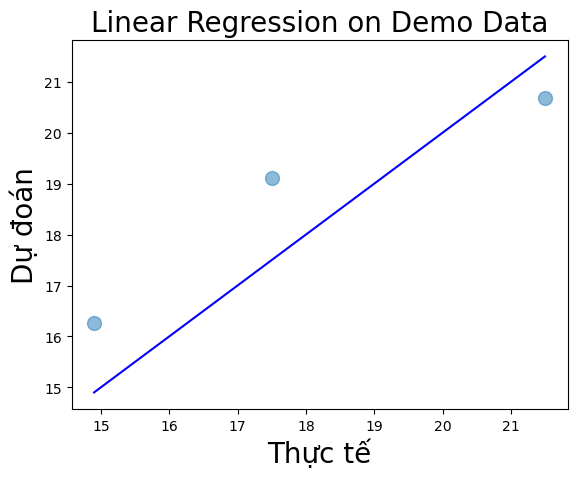

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([19.10245715, 16.26240225, 20.6748824 ]),
 0.7690819723194622)

In [142]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
y_demo_pred = ridge_model.predict(X_demo)
plot_evaluate(y_demo, y_demo_pred, 'Linear Regression on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# 2-degree Polynomial Regression

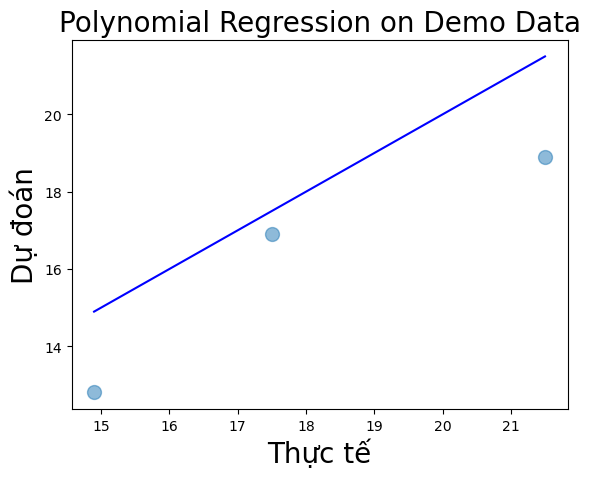

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([16.91854678, 12.8100945 , 18.90653021]),
 0.4828764277482528)

In [143]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
ridge_poly = Ridge(alpha = 10)
ridge_poly.fit(X_train_poly, y_train)
X_demo_poly = poly_features.fit_transform(X_demo)
y_demo_pred = ridge_poly.predict(X_demo_poly)
plot_evaluate(y_demo, y_demo_pred, 'Polynomial Regression on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# K Nearest Neighbours

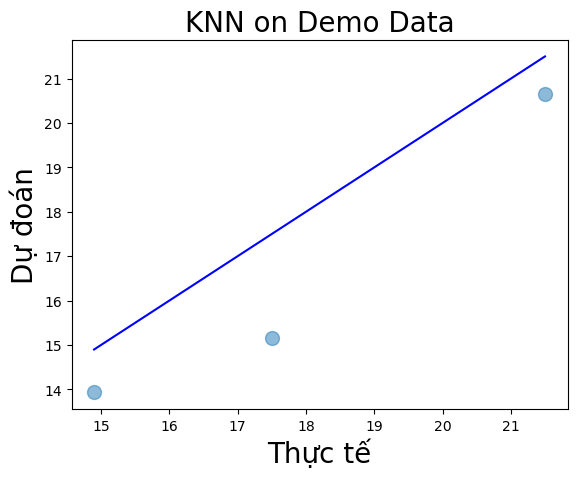

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([15.15      , 13.93333333, 20.65      ]),
 0.6752362283876157)

In [144]:
from sklearn.neighbors import KNeighborsRegressor
knn_l1_model = KNeighborsRegressor(n_neighbors=3, p=1)
knn_l1_model.fit(X_train, y_train)
y_demo_pred = knn_l1_model.predict(X_demo)
plot_evaluate(y_demo, y_demo_pred, 'KNN on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# Decision Tree

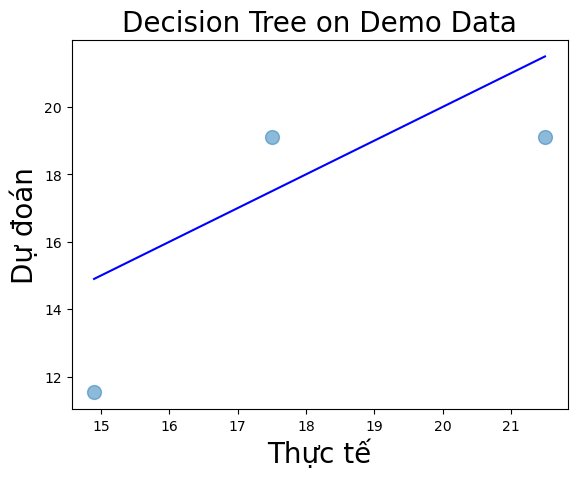

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([19.10288136, 11.53368085, 19.10288136]),
 0.11124045322255127)

In [145]:
from sklearn.tree import DecisionTreeRegressor

tree_pruned_model = DecisionTreeRegressor(max_depth = 7, ccp_alpha=0.6226)
tree_pruned_model.fit(X_train, y_train)
y_demo_pred = tree_pruned_model.predict(X_demo)
plot_evaluate(y_demo, y_demo_pred, 'Decision Tree on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# Random Forest

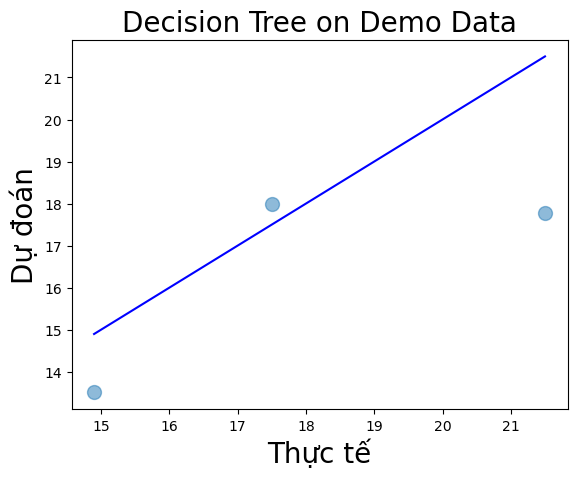

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([17.99383333, 13.510795  , 17.77775   ]),
 0.2749288168439613)

In [146]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train, y_train)
y_demo_pred = rf_model.predict(X_demo)
plot_evaluate(y_demo, y_demo_pred, 'Decision Tree on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)


# Bayesian Additive Regression Tree (BART)

Iteration  100/1100 P_grow=0.57 P_prune=0.43 A_grow=0.17 A_prune=0.21 (burnin)
Iteration  200/1100 P_grow=0.46 P_prune=0.54 A_grow=0.22 A_prune=0.19
Iteration  300/1100 P_grow=0.49 P_prune=0.51 A_grow=0.13 A_prune=0.12
Iteration  400/1100 P_grow=0.51 P_prune=0.49 A_grow=0.10 A_prune=0.28
Iteration  500/1100 P_grow=0.47 P_prune=0.53 A_grow=0.18 A_prune=0.26
Iteration  600/1100 P_grow=0.60 P_prune=0.40 A_grow=0.17 A_prune=0.22
Iteration  700/1100 P_grow=0.49 P_prune=0.51 A_grow=0.13 A_prune=0.20
Iteration  800/1100 P_grow=0.55 P_prune=0.45 A_grow=0.18 A_prune=0.19
Iteration  900/1100 P_grow=0.55 P_prune=0.45 A_grow=0.18 A_prune=0.11
Iteration 1000/1100 P_grow=0.50 P_prune=0.50 A_grow=0.22 A_prune=0.17
Iteration 1100/1100 P_grow=0.56 P_prune=0.44 A_grow=0.24 A_prune=0.14


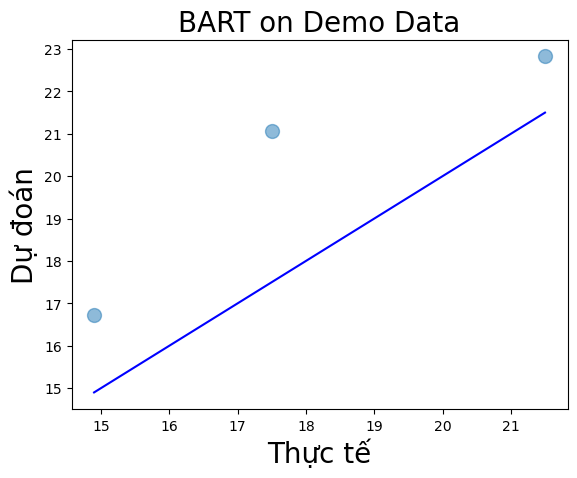

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([21.069021, 16.733126, 22.825743], dtype=float32),
 0.1922863668065985)

In [147]:
import bartz

bart_depth_model = bartz.BART.gbart(X_train.T, y_train, maxdepth =11, ntree = 80)
y_demo_pred = np.average(bart_depth_model.predict(X_demo.T), axis=0)
plot_evaluate(y_demo, y_demo_pred, 'BART on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# Xgboost

[0]	train-rmse:9.66355	eval-rmse:4.86046
[1]	train-rmse:9.20466	eval-rmse:4.79150
[2]	train-rmse:8.81116	eval-rmse:4.74457
[3]	train-rmse:8.46656	eval-rmse:4.50167
[4]	train-rmse:8.15515	eval-rmse:4.19423
[5]	train-rmse:7.89111	eval-rmse:4.17413
[6]	train-rmse:7.64176	eval-rmse:4.11015
[7]	train-rmse:7.42805	eval-rmse:3.79190
[8]	train-rmse:7.21111	eval-rmse:3.80413
[9]	train-rmse:7.02419	eval-rmse:3.77676
[10]	train-rmse:6.84754	eval-rmse:3.95130
[11]	train-rmse:6.70069	eval-rmse:3.64027
[12]	train-rmse:6.55953	eval-rmse:3.72782
[13]	train-rmse:6.40799	eval-rmse:3.69673
[14]	train-rmse:6.28015	eval-rmse:3.47418
[15]	train-rmse:6.15703	eval-rmse:3.25687
[16]	train-rmse:6.04279	eval-rmse:3.30516
[17]	train-rmse:5.94855	eval-rmse:3.20592
[18]	train-rmse:5.86031	eval-rmse:3.13563
[19]	train-rmse:5.76659	eval-rmse:2.98857
[20]	train-rmse:5.68366	eval-rmse:2.83210
[21]	train-rmse:5.60249	eval-rmse:2.77781
[22]	train-rmse:5.53984	eval-rmse:2.76440
[23]	train-rmse:5.46147	eval-rmse:2.58437
[2

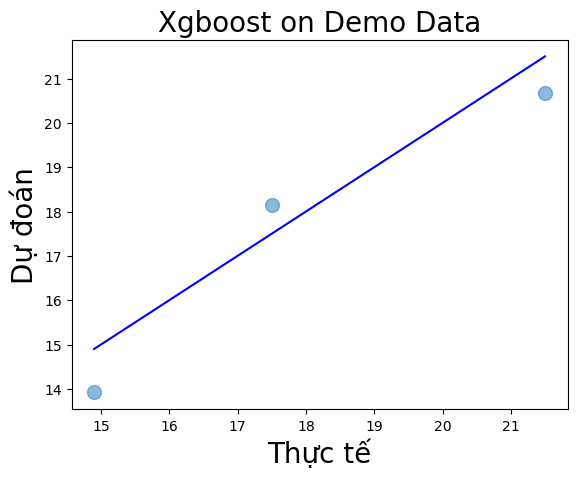

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([18.144728, 13.920202, 20.671007], dtype=float32),
 0.9066839608807995)

In [148]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddemo = xgb.DMatrix(X_demo, label=y_demo)
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 6,
    'subsample': 0.9,       
}
evals = [(dtrain, 'train'), (ddemo, 'eval')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=2000,
    evals=evals,
    early_stopping_rounds=100,  
)

y_demo_pred = model.predict(ddemo, iteration_range=(0, model.best_iteration + 1))
plot_evaluate(y_demo, y_demo_pred, 'Xgboost on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# Light Gradient Boosting

Training until validation scores don't improve for 500 rounds
[100]	demo's rmse: 2.86087
[200]	demo's rmse: 2.07934
[300]	demo's rmse: 1.64984
[400]	demo's rmse: 1.60745
[500]	demo's rmse: 1.37295
[600]	demo's rmse: 1.19544
[700]	demo's rmse: 1.11275
[800]	demo's rmse: 1.09438
[900]	demo's rmse: 1.09038
[1000]	demo's rmse: 1.10116
[1100]	demo's rmse: 1.08638
[1200]	demo's rmse: 1.12321
[1300]	demo's rmse: 1.13433
Early stopping, best iteration is:
[846]	demo's rmse: 1.07264


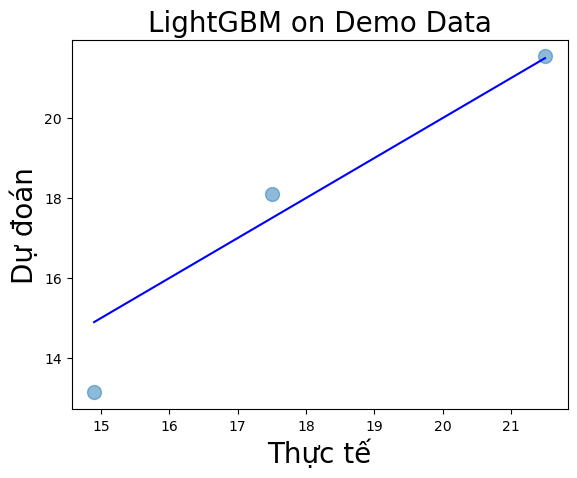

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([18.09882688, 13.14181975, 21.54314209]),
 0.8438637221620098)

In [149]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
demo_data = lgb.Dataset(X_demo, label=y_demo)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,         
    'num_leaves': 30,              
    'max_depth': 8,               
    'min_data_in_leaf': 20,       
    'verbosity': -1
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[demo_data],
    valid_names=['demo'],
    num_boost_round=2000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=500),
        lgb.log_evaluation(period=100)
    ],
)

y_demo_pred = model.predict(X_demo, num_iteration=model.best_iteration)
plot_evaluate(y_demo, y_demo_pred, 'LightGBM on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# Support Vector Regression

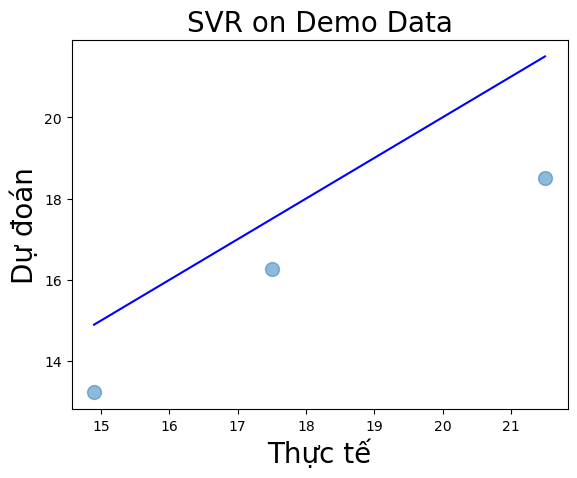

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([16.28175018, 13.23283938, 18.50004541]),
 0.40003235761007727)

In [150]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf', gamma=0.0513, C=51, epsilon=2.5806)
svr_model.fit(X_train, y_train)
y_demo_pred = svr_model.predict(X_demo)

plot_evaluate(y_demo, y_demo_pred, 'SVR on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)

# Multilayer Perception

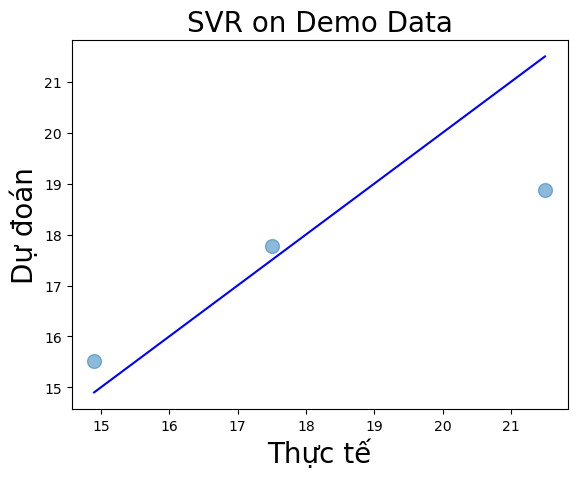

(1    17.5
 3    14.9
 4    21.5
 Name: price, dtype: float64,
 array([[17.772203],
        [15.512226],
        [18.867813]], dtype=float32),
 0.6662851323402812)

In [151]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_demo_tensor = torch.tensor(X_demo, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)


def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(69)

class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_sizes):
        super(FlexibleMLP, self).__init__()
        layers = []
        in_features = input_dim
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_features, hidden_size))
            layers.append(nn.LeakyReLU(negative_slope=0.01))
            layers.append(nn.Dropout(0.28))
            in_features = hidden_size
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


hidden_sizes = [256, 128, 64]

model = FlexibleMLP(X_test_tensor.shape[1], hidden_sizes)
checkpoint = torch.load('/Users/vietnguyen/Desktop/Deep learning/predict_bds_project2/my_project/checkpoint/best_mlp_checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

with torch.no_grad():
    y_demo_pred_scaled = model(X_demo_tensor)
    y_demo_pred = scaler_y.inverse_transform(y_demo_pred_scaled.numpy())

plot_evaluate(y_demo, y_demo_pred, 'SVR on Demo Data')
y_demo, y_demo_pred, r2_score(y_demo, y_demo_pred)